# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import GridSearchCV, cross_val_score

pd.options.mode.chained_assignment = None

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

## Подготовка данных

In [2]:
train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
display(train.head())
train.info()
train.isna().sum()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


date                                                     0
final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.concentrate_au                              0
final.output.recovery                                    0
final.output.tail_ag                                     0
final.output.tail_pb                                   100
final.output.tail_sol                                    5
final.output.tail_au                                     0
primary_cleaner.input.sulfate                           20
primary_cleaner.input.depressant                        32
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         100
primary_cleaner.output.concentrate_ag                    0
primary_cleaner.output.concentrate_pb                   86
primary_cleaner.output.concentrate_sol                 2

In [4]:
display(test.head())
test.info()
test.isna().sum()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

In [5]:
display(full.head())
full.info()
full.isna().sum()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


date                                                     0
final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.concentrate_au                              0
final.output.recovery                                    0
final.output.tail_ag                                     1
final.output.tail_pb                                   101
final.output.tail_sol                                    6
final.output.tail_au                                     0
primary_cleaner.input.sulfate                           24
primary_cleaner.input.depressant                        37
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         104
primary_cleaner.output.concentrate_ag                    0
primary_cleaner.output.concentrate_pb                  116
primary_cleaner.output.concentrate_sol                 3

In [6]:
C = train['rougher.output.concentrate_au']  
F = train['rougher.input.feed_au']
T = train['rougher.output.tail_au']

train['recovery'] = (C * (F - T)) / (F * (C - T)) * 100

mae = mean_absolute_error(train['recovery'], train['rougher.output.recovery'])
print('MAE:', mae)

MAE: 9.73512347450521e-15


In [7]:
#Список признаков трейна, которые отсутствуют в тесте
train.columns.difference(test.columns).tolist()

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'recovery',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'roug

In [8]:
train = train.ffill()
test = test.ffill()
full = full.ffill()

<b>Вывод</b>  
Во время изучения датасетов выявил пропуски, которые заполнил ближайшими значениями (как в условиях проекта).  
Нашел признаки в трейне, которых нет в тесте. Эти признаки отсутствуют, потому что замеряются и рассчитываются гораздо позже.  
Проверил правильность рассчета эффективности обогащения: вычислил эффективность обогащения после флотации на трейне и нашел среднюю абсолютную ошибку между рассчитанными значениями и значениям признака. Исходя из того, что средняя абсолютная ошибка близка к 0, сделал вывод, что данные корректны.

## Анализ данных

In [9]:
au = full[[
    'rougher.input.feed_au', 'rougher.output.concentrate_au', 
    'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au'
]]
ag = full[[
    'rougher.input.feed_ag', 'rougher.output.concentrate_ag',
    'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag'
]]
pb = full[[
    'rougher.input.feed_pb', 'rougher.output.concentrate_pb',
    'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb'
]]

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


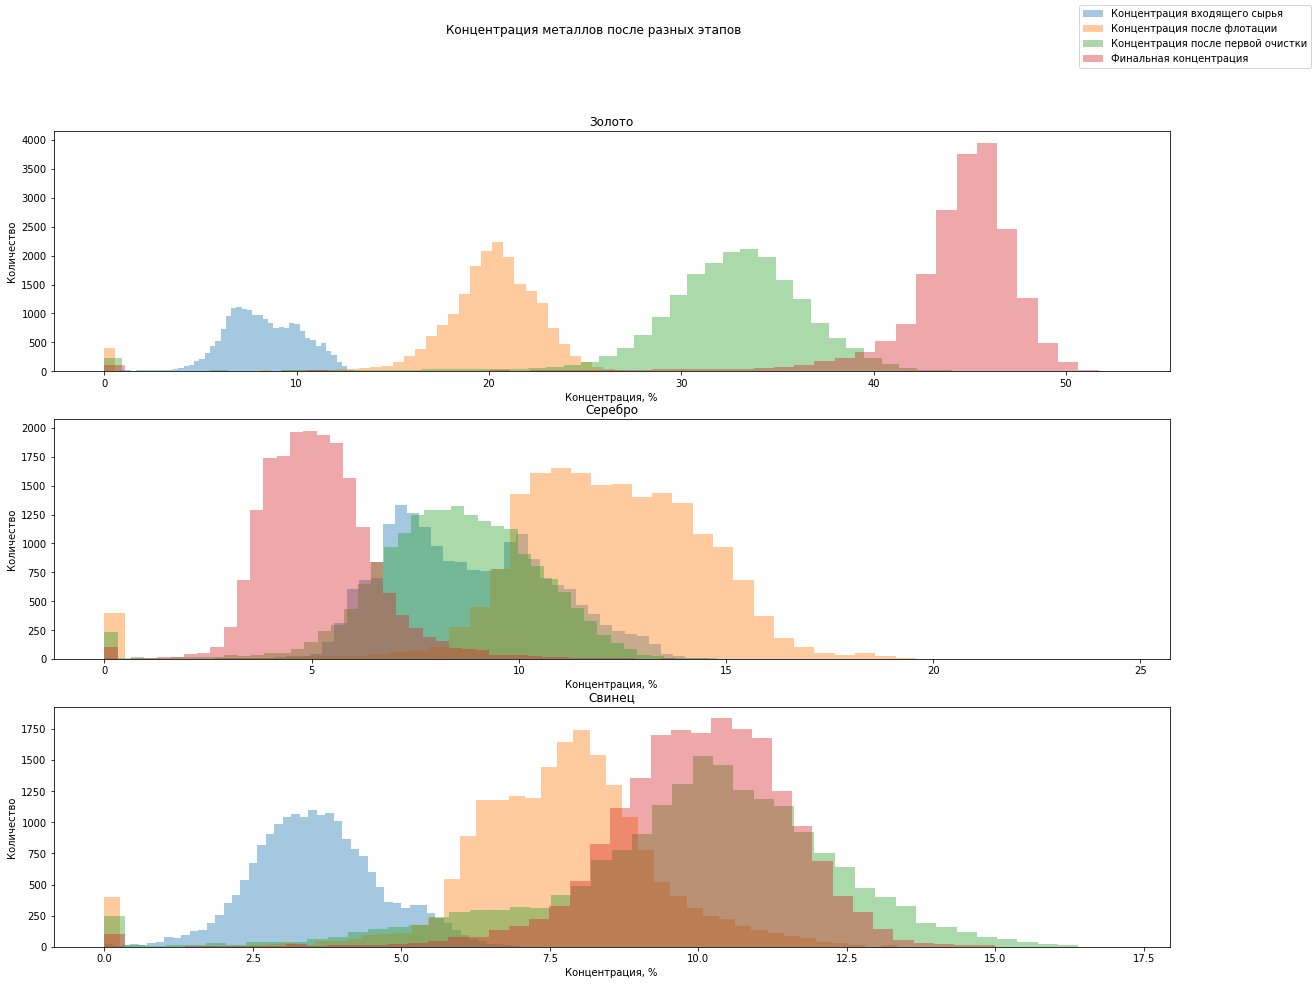

In [10]:
fig, axes = plt.subplots(3, 1, figsize=(20, 15))
for column in list(au):
    sns.distplot(au[column], ax=axes[0], kde=False)
axes[0].set(title='Золото', xlabel='Концентрация, %', ylabel='Количество')
for column in list(ag):
    sns.distplot(ag[column], ax=axes[1], kde=False)
axes[1].set(title='Серебро', xlabel='Концентрация, %', ylabel='Количество')
for column in list(pb):
    sns.distplot(pb[column], ax=axes[2], kde=False)
axes[2].set(title='Свинец', xlabel='Концентрация, %', ylabel='Количество')
fig.suptitle('Концентрация металлов после разных этапов')
fig.legend(['Концентрация входящего сырья', 'Концентрация после флотации', 'Концентрация после первой очистки', 'Финальная концентрация',])
fig.show()

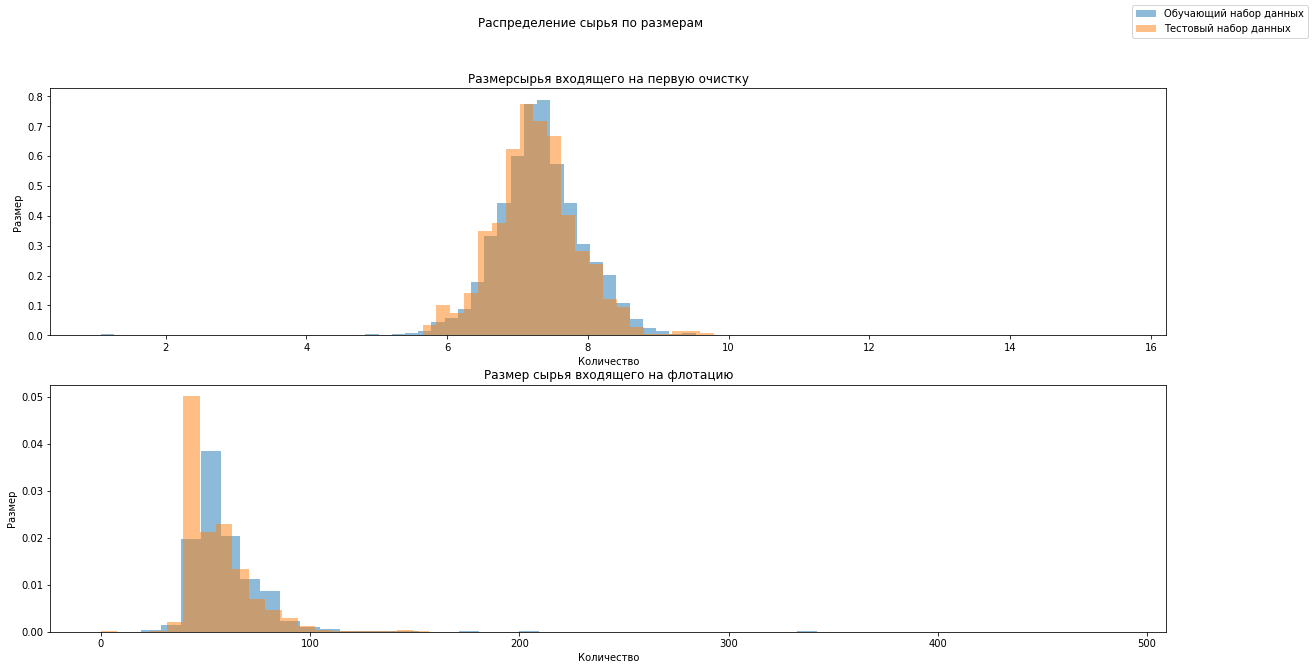

In [11]:
fig, axes = plt.subplots(2,1, figsize=(20, 10))
axes[0].hist(train['primary_cleaner.input.feed_size'], density=True, alpha=0.5, bins=50)
axes[0].hist(test['primary_cleaner.input.feed_size'], density=True, alpha=0.5, bins=50)
axes[0].set(title='Размерсырья входящего на первую очистку', xlabel='Количество', ylabel='Размер')
axes[1].hist(train['rougher.input.feed_size'], density=True, alpha=0.5, bins=50)
axes[1].hist(test['rougher.input.feed_size'], density=True, alpha=0.5, bins=50)
axes[1].set(title='Размер сырья входящего на флотацию', xlabel='Количество', ylabel='Размер')
fig.suptitle('Распределение сырья по размерам')
fig.legend(['Обучающий набор данных', 'Тестовый набор данных'])
fig.show()

In [12]:
full['rougher.input.feed'] = full['rougher.input.feed_au'] + full['rougher.input.feed_ag'] + full['rougher.input.feed_pb'] + full['rougher.input.feed_sol']
full['rougher.output.concentrate'] = full['rougher.output.concentrate_au'] + full['rougher.output.concentrate_ag'] + full['rougher.output.concentrate_pb'] + full['rougher.output.concentrate_sol']
full['final.output.concentrate'] = full['final.output.concentrate_au'] + full['final.output.concentrate_ag'] + full['final.output.concentrate_pb'] + full['final.output.concentrate_sol']
concentrate = full[['rougher.input.feed', 'rougher.output.concentrate', 'final.output.concentrate']]

(19439, 90)

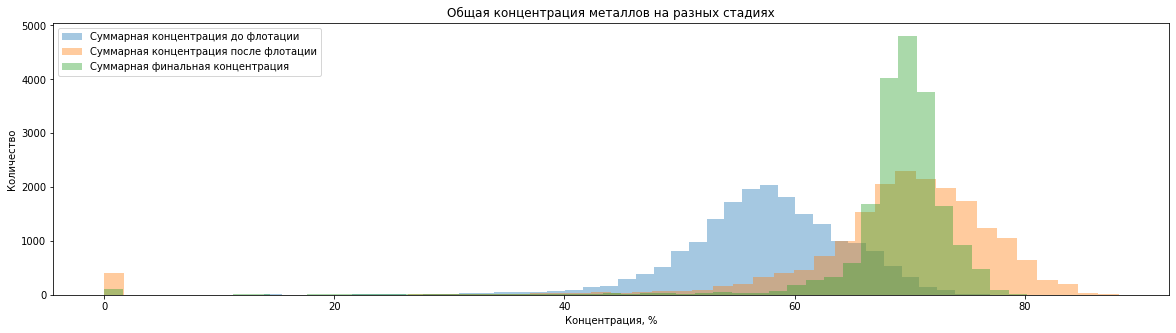

In [13]:
fig = plt.figure(figsize=(20, 5))
for column in list(concentrate):
    sns.distplot(concentrate[column], kde=False)
plt.legend(['Суммарная концентрация до флотации', 'Суммарная концентрация после флотации', 'Суммарная финальная концентрация'])
plt.title('Общая концентрация металлов на разных стадиях')
plt.xlabel('Концентрация, %')
plt.ylabel('Количество')
fig.show()
full.shape

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(18610, 90)

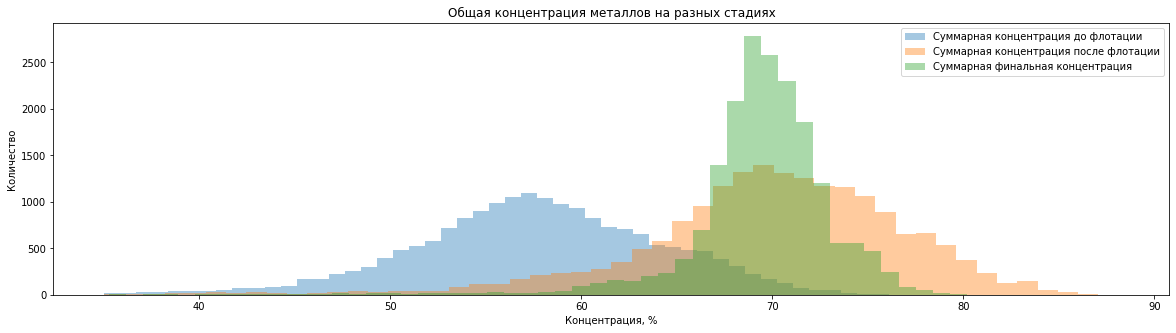

In [14]:
full=full[full['rougher.input.feed'] > 35]
full=full[full['rougher.output.concentrate'] > 35]
full=full[full['final.output.concentrate'] > 35]
concentrate_1 = full[['rougher.input.feed', 'rougher.output.concentrate', 'final.output.concentrate']]
fig = plt.figure(figsize=(20, 5))
for column in list(concentrate_1):
    sns.distplot(concentrate_1[column], kde=False)
plt.legend(['Суммарная концентрация до флотации', 'Суммарная концентрация после флотации', 'Суммарная финальная концентрация'])
plt.title('Общая концентрация металлов на разных стадиях')
plt.xlabel('Концентрация, %')
plt.ylabel('Количество')
fig.show()
full.shape

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


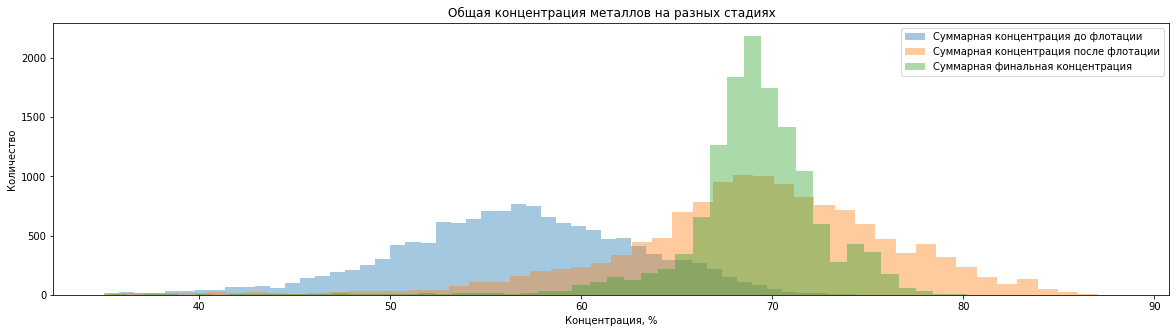

In [15]:
train['rougher.input.feed'] = train['rougher.input.feed_au'] + train['rougher.input.feed_ag'] + train['rougher.input.feed_pb'] + train['rougher.input.feed_sol']
train['rougher.output.concentrate'] = train['rougher.output.concentrate_au'] + train['rougher.output.concentrate_ag'] + train['rougher.output.concentrate_pb'] + train['rougher.output.concentrate_sol']
train['final.output.concentrate'] = train['final.output.concentrate_au'] + train['final.output.concentrate_ag'] + train['final.output.concentrate_pb'] + train['final.output.concentrate_sol']

train = train[train['rougher.input.feed'] > 35]
train = train[train['rougher.output.concentrate'] > 35]
train = train[train['final.output.concentrate'] > 35]

concentrate_2 = train[['rougher.input.feed', 'rougher.output.concentrate', 'final.output.concentrate']]
fig = plt.figure(figsize=(20, 5))
for column in list(concentrate_2):
    sns.distplot(concentrate_2[column], kde=False)
plt.legend(['Суммарная концентрация до флотации', 'Суммарная концентрация после флотации', 'Суммарная финальная концентрация'])
plt.title('Общая концентрация металлов на разных стадиях')
plt.xlabel('Концентрация, %')
plt.ylabel('Количество')
fig.show()

<b>Вывод</b>  
В данном разделе построил гистограммы по некоторым признакам.  
Построил гистограммы для концентрации металлов на различных этапах технологического процесса. Концентрации распределны нормально, за исключением присутствующих значений в районе 0. Логично что, по мере продвижения тех процесса концентрация золота стремительно растет, получают же золото. Концентрация серебра после флотации выросла, а после финальной отчистки уменьшилась, возможно после этого этапа серебро остается в отвальных хвостах. Концентрация свинца на этапах процесса незначительно растет.   
Построил гистограммы распределения размеров гранул сырья. Значения также распределены нормально.  
Построил гистограмму распределения суммарных концентраций металлов на различных этапах технологического процесса. Данные распределены нормально. Удалил значения меньше 35, потому что их частота нулевая.

## Модель

In [16]:
test = pd.merge(test, full)
target_test = test[['rougher.output.recovery','final.output.recovery']]

In [17]:
test.drop(test.iloc[:, 53:87], inplace=True, axis=1)
features_test = test.drop(['date'], axis=1)

In [18]:
columns = test.columns

In [19]:
features_train = train[columns]
features_train = features_train.drop(['date'],axis=1)
target_train = train[['rougher.output.recovery', 'final.output.recovery']]

In [20]:
def smape_func(target, predict):
    smape = (abs(target - predict)) / ((abs(target) + abs(predict)) / 2)
    smape = smape.mean() * 100
    return smape * (-1)

def final_smape_func(smape_rougher, smape_final):
    final_smape = (0.25 * smape_rougher + 0.75 * smape_final).mean()
    return final_smape

In [21]:
smape_score = make_scorer(smape_func, greater_is_better=False)

<br/>    
<div class="alert alert-info">
<h2> Комментарий студента v. 1: <a class="tocSkip"> </h2>

Домножил на -1, хотя в Dummy модели не понял почему smape стало отрицательным
</div> 

<br/>    

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> ее можно  просто домножить на -1

In [22]:
model_lr = LinearRegression()

score_lr_r = cross_val_score(model_lr, features_train, target_train['rougher.output.recovery'], scoring=smape_score, cv=5)
score_lr_f = cross_val_score(model_lr, features_train, target_train['final.output.recovery'], scoring=smape_score, cv=5)

score_lr = final_smape_func(score_lr_r, score_lr_f)
print('Лучшая средняя sMAPE', score_lr)

Лучшая средняя sMAPE 9.695894910884162


In [23]:
model_dtr = DecisionTreeRegressor(random_state=12345)

parametrs = {"max_depth": range(1, 10, 1)}

grid_dtr_r = GridSearchCV(model_dtr, parametrs, cv=5, scoring=smape_score)
grid_dtr_r.fit(features_train, target_train['rougher.output.recovery'])

print('Лучшая глубина:', grid_dtr_r.best_params_)
print('Лучшая sMAPE:', grid_dtr_r.best_score_)

grid_dtr_f = GridSearchCV(model_dtr, parametrs, cv=5, scoring=smape_score)
grid_dtr_f.fit(features_train, target_train['final.output.recovery'])

print('Лучшая глубина:', grid_dtr_f.best_params_)
print('Лучшая sMAPE:', grid_dtr_f.best_score_)

score_dtr = final_smape_func(grid_dtr_r.best_score_, grid_dtr_f.best_score_)
print('Лучшая средняя sMAPE:', score_dtr)

Лучшая глубина: {'max_depth': 8}
Лучшая sMAPE: 8.304822768292105
Лучшая глубина: {'max_depth': 9}
Лучшая sMAPE: 10.546277244760764
Лучшая средняя sMAPE: 9.9859136256436


In [24]:
model_rfr = RandomForestRegressor(random_state=12345)

parametrs = {'max_depth': range(1, 10, 1),
             'n_estimators': range(1, 10, 1)}

grid_rfr_r = GridSearchCV(model_rfr, parametrs, cv=5, scoring=smape_score)
grid_rfr_r.fit(features_train, target_train['rougher.output.recovery'])
print('Лучшие глубина и количество деревьев:', grid_rfr_r.best_params_)
print('Лучшая sMAPE:', grid_rfr_r.best_score_)

grid_rfr_f = GridSearchCV(model_rfr, parametrs, cv=5, scoring=smape_score)
grid_rfr_f.fit(features_train, target_train['final.output.recovery'])
print('Лучшие глубина и количество деревьев:', grid_rfr_f.best_params_)
print('Лучшая sMAPE:', grid_rfr_f.best_score_)

score_rfr = final_smape_func(grid_rfr_r.best_score_, grid_rfr_f.best_score_)
print('Лучшая средняя sMAPE:', score_rfr)

Лучшие глубина и количество деревьев: {'max_depth': 9, 'n_estimators': 1}
Лучшая sMAPE: 8.468058252305273
Лучшие глубина и количество деревьев: {'max_depth': 9, 'n_estimators': 1}
Лучшая sMAPE: 12.140895135343541
Лучшая средняя sMAPE: 11.222685914583973


In [25]:
model = LinearRegression()

model.fit(features_train, target_train['rougher.output.recovery'])
predictions_r = model.predict(features_test)

model.fit(features_train, target_train['final.output.recovery'])
predictions_f = model.predict(features_test)

smape_r = smape_func(target_test['rougher.output.recovery'], predictions_r)
smape_f = smape_func(target_test['final.output.recovery'], predictions_f)

final_smape = final_smape_func(smape_r, smape_f)
print('sMAPE теста:', final_smape * (-1))

sMAPE теста: 7.223315451559101


In [26]:
model_dr = DummyRegressor(strategy='mean')

model_dr.fit(features_train, target_train['rougher.output.recovery'])
predicted_r = model_dr.predict(features_test)

model_dr.fit(features_train, target_train['final.output.recovery'])
predicted_f = model_dr.predict(features_test)

smape_dr_r = smape_func(target_test['rougher.output.recovery'], predicted_r)

smape_dr_f = smape_func(target_test['final.output.recovery'], predicted_f)

smape_dr = final_smape_func(smape_dr_r, smape_dr_f)
print('sMAPE для Dummy:', smape_dr * (-1))

sMAPE для Dummy: 7.40693004704047


<b>Вывод</b>  
В данном разделе написал функцию для вычисления sMAPE.  
Обучил три модели и проверил качество с помощью кросс-валидации на основе sMAPE. Выявил лучшую модель - линейная регрессия.
Поэтому с помощью линейной регрессии получил предсказания на тестовой выборкеи посчитал sMAPE.  
Проверил адекватность модели с помощью DummyRegressor. Оказалось, что у модели на тестовой выборке sMAPE получилось меньше чем в модели Dummy, значит модель подходит для предсказания.

## Общий вывод

В данном проекте данные были изучены и предобработаны: заполнены пропуски и рповерено, что эффективность обогащения расчитана правильно.  
Построены гистограммы распределения концентрации металлов, распределения размеров гранул сырья, распределения суммарной концентрации металлов на разных этапах очистки. Данные распределены нормально.  
Обучены несколько моделей и проверено их качество с помощью кросс-валидации на основе sMAPE. Выявлена лучшая модель и была обучена на тестовой выборке. Проверена адекаватность модели и получилось, что на основе sMAPE модель корректна и может использоваться для предсказания.